In [1]:
#! pip install vaex

In [2]:
# Importing important lobraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
chiller_Kwh_consumption=pd.read_csv('FullRawChillerPlant.csv')

In [4]:
#checking the shape of the data
chiller_Kwh_consumption.shape

(712196, 38)

In [5]:
# checking the first five rows of the data
chiller_Kwh_consumption.head()

,Unnamed: 0.1,CP_Chiller1_ChilledWaterFlowrate,CP_Chiller1_ChilledWaterReturnTemp,CP_Chiller1_ChilledWaterSupplyTemp,CP_Chiller1_CondenserWaterFlowrate,CP_Chiller1_CondenserWaterReturnTemp,CP_Chiller1_CondenserWaterSupplyTemp,CP_Chiller1_CoolingTons,CP_Chiller1_Efficiency,CP_Chiller1_kW,...,CP_CoolingTower1_CondenserWaterSupplyTemp,CP_CoolingTower2_CondenserWaterSupplyTemp,CP_CoolingTower3_CondenserWaterSupplyTemp,CP_CoolingTower4_CondenserWaterSupplyTemp,CP_CoolingTower5_CondenserWaterSupplyTemp,CP_CoolingTower6_CondenserWaterSupplyTemp,CP_CoolingTower7_CondenserWaterSupplyTemp,CP_CoolingTower8_CondenserWaterSupplyTemp,CP_CoolingTower9_CondenserWaterSupplyTemp,Unnamed: 0
0,2011-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2011-06-01 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2011-06-01 00:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2011-06-01 00:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2011-06-01 00:12:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
chiller_Kwh_consumption.columns

Index(['Unnamed: 0.1', 'CP_Chiller1_ChilledWaterFlowrate',
       'CP_Chiller1_ChilledWaterReturnTemp',
       'CP_Chiller1_ChilledWaterSupplyTemp',
       'CP_Chiller1_CondenserWaterFlowrate',
       'CP_Chiller1_CondenserWaterReturnTemp',
       'CP_Chiller1_CondenserWaterSupplyTemp', 'CP_Chiller1_CoolingTons',
       'CP_Chiller1_Efficiency', 'CP_Chiller1_kW',
       'CP_Chiller2_ChilledWaterFlowrate',
       'CP_Chiller2_ChilledWaterReturnTemp',
       'CP_Chiller2_ChilledWaterSupplyTemp',
       'CP_Chiller2_CondenserWaterFlowrate',
       'CP_Chiller2_CondenserWaterReturnTemp',
       'CP_Chiller2_CondenserWaterSupplyTemp', 'CP_Chiller2_CoolingTons',
       'CP_Chiller2_Efficiency', 'CP_Chiller2_kW',
       'CP_Chiller3_ChilledWaterFlowrate',
       'CP_Chiller3_ChilledWaterReturnTemp',
       'CP_Chiller3_ChilledWaterSupplyTemp',
       'CP_Chiller3_CondenserWaterFlowrate',
       'CP_Chiller3_CondenserWaterReturnTemp',
       'CP_Chiller3_CondenserWaterSupplyTemp', 'CP_Chiller3

In [7]:
chiller_Kwh_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712196 entries, 0 to 712195
Data columns (total 38 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Unnamed: 0.1                               712196 non-null  object 
 1   CP_Chiller1_ChilledWaterFlowrate           443255 non-null  float64
 2   CP_Chiller1_ChilledWaterReturnTemp         443254 non-null  float64
 3   CP_Chiller1_ChilledWaterSupplyTemp         443251 non-null  float64
 4   CP_Chiller1_CondenserWaterFlowrate         443254 non-null  float64
 5   CP_Chiller1_CondenserWaterReturnTemp       443253 non-null  float64
 6   CP_Chiller1_CondenserWaterSupplyTemp       443253 non-null  float64
 7   CP_Chiller1_CoolingTons                    443255 non-null  float64
 8   CP_Chiller1_Efficiency                     443127 non-null  float64
 9   CP_Chiller1_kW                             443252 non-null  float64
 10  CP_Chill

In [8]:
# We will check for null values
round((chiller_Kwh_consumption.isna().sum()/chiller_Kwh_consumption.shape[0])*100,2).sort_values(ascending=False)

Unnamed: 0                                   100.00
CP_Chiller2_CoolingTons                       48.45
CP_CoolingTower9_CondenserWaterSupplyTemp     37.78
CP_Chiller2_Efficiency                        37.78
CP_Chiller1_Efficiency                        37.78
CP_CoolingTower3_CondenserWaterSupplyTemp     37.78
CP_Chiller3_kW                                37.76
CP_Chiller3_CondenserWaterReturnTemp          37.76
CP_Chiller3_CondenserWaterSupplyTemp          37.76
CP_Chiller3_CoolingTons                       37.76
CP_Chiller3_Efficiency                        37.76
CP_CoolingTower2_CondenserWaterSupplyTemp     37.76
CP_CoolingTower1_CondenserWaterSupplyTemp     37.76
CP_Chiller3_ChilledWaterSupplyTemp            37.76
CP_CoolingTower4_CondenserWaterSupplyTemp     37.76
CP_CoolingTower5_CondenserWaterSupplyTemp     37.76
CP_CoolingTower6_CondenserWaterSupplyTemp     37.76
CP_CoolingTower7_CondenserWaterSupplyTemp     37.76
CP_CoolingTower8_CondenserWaterSupplyTemp     37.76
CP_Chiller3_

In [9]:
# We will rename the 'Unnamed: 0.1' column to Date and then wil get only date part of it
chiller_Kwh_consumption['Date']=pd.to_datetime(chiller_Kwh_consumption['Unnamed: 0.1'])
chiller_Kwh_consumption['Date']=chiller_Kwh_consumption['Date'].dt.date
chiller_Kwh_consumption.drop('Unnamed: 0.1',axis=1,inplace=True)

In [10]:
chiller_Kwh_consumption.head()

,CP_Chiller1_ChilledWaterFlowrate,CP_Chiller1_ChilledWaterReturnTemp,CP_Chiller1_ChilledWaterSupplyTemp,CP_Chiller1_CondenserWaterFlowrate,CP_Chiller1_CondenserWaterReturnTemp,CP_Chiller1_CondenserWaterSupplyTemp,CP_Chiller1_CoolingTons,CP_Chiller1_Efficiency,CP_Chiller1_kW,CP_Chiller2_ChilledWaterFlowrate,...,CP_CoolingTower2_CondenserWaterSupplyTemp,CP_CoolingTower3_CondenserWaterSupplyTemp,CP_CoolingTower4_CondenserWaterSupplyTemp,CP_CoolingTower5_CondenserWaterSupplyTemp,CP_CoolingTower6_CondenserWaterSupplyTemp,CP_CoolingTower7_CondenserWaterSupplyTemp,CP_CoolingTower8_CondenserWaterSupplyTemp,CP_CoolingTower9_CondenserWaterSupplyTemp,Unnamed: 0,Date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011-06-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011-06-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011-06-01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011-06-01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011-06-01


#### We will use iterative imputer as simply putting Null Values is not right representation of Data
#### we will drop 'Unnamed: 0' column as it contains 100% missing values

In [11]:
chiller_Kwh_consumption.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
# creating an object of Linear regression and iterative imputer
lr=LinearRegression()
It_imp=IterativeImputer(estimator=lr,max_iter=10)

# fitting and transforming the data
cleaned_data=It_imp.fit_transform(chiller_Kwh_consumption.iloc[:,0:-1])


In [13]:
columns_lst=list(chiller_Kwh_consumption.columns[0:-1])
chiller_Kwh_consumption[columns_lst]=cleaned_data
chiller_Kwh_consumption.isnull().sum()

CP_Chiller1_ChilledWaterFlowrate             0
CP_Chiller1_ChilledWaterReturnTemp           0
CP_Chiller1_ChilledWaterSupplyTemp           0
CP_Chiller1_CondenserWaterFlowrate           0
CP_Chiller1_CondenserWaterReturnTemp         0
CP_Chiller1_CondenserWaterSupplyTemp         0
CP_Chiller1_CoolingTons                      0
CP_Chiller1_Efficiency                       0
CP_Chiller1_kW                               0
CP_Chiller2_ChilledWaterFlowrate             0
CP_Chiller2_ChilledWaterReturnTemp           0
CP_Chiller2_ChilledWaterSupplyTemp           0
CP_Chiller2_CondenserWaterFlowrate           0
CP_Chiller2_CondenserWaterReturnTemp         0
CP_Chiller2_CondenserWaterSupplyTemp         0
CP_Chiller2_CoolingTons                      0
CP_Chiller2_Efficiency                       0
CP_Chiller2_kW                               0
CP_Chiller3_ChilledWaterFlowrate             0
CP_Chiller3_ChilledWaterReturnTemp           0
CP_Chiller3_ChilledWaterSupplyTemp           0
CP_Chiller3_C

In [14]:
# We will calculate total chiller_plant KWh by adding Kwh of three chillers
chiller_Kwh_consumption['Total_Kwh_plant']=chiller_Kwh_consumption['CP_Chiller1_kW']+chiller_Kwh_consumption['CP_Chiller2_kW']+chiller_Kwh_consumption['CP_Chiller3_kW']                                  

#### currently the data which we have is devided hourly and then daily,month and so on. We will group the data on daily basis and will take sum avg of Totak_kwh plant  


In [15]:
grouped_data=chiller_Kwh_consumption.groupby(by='Date')['Total_Kwh_plant'].agg('sum')
grouped_data.head()
TS_df=pd.DataFrame()
TS_df['Total_kwh']=grouped_data
TS_df.index=grouped_data.index
TS_df.head()

,Total_kwh
Date,
2011-06-01,0.0
2011-06-02,0.0
2011-06-03,0.0
2011-06-04,0.0
2011-06-05,0.0


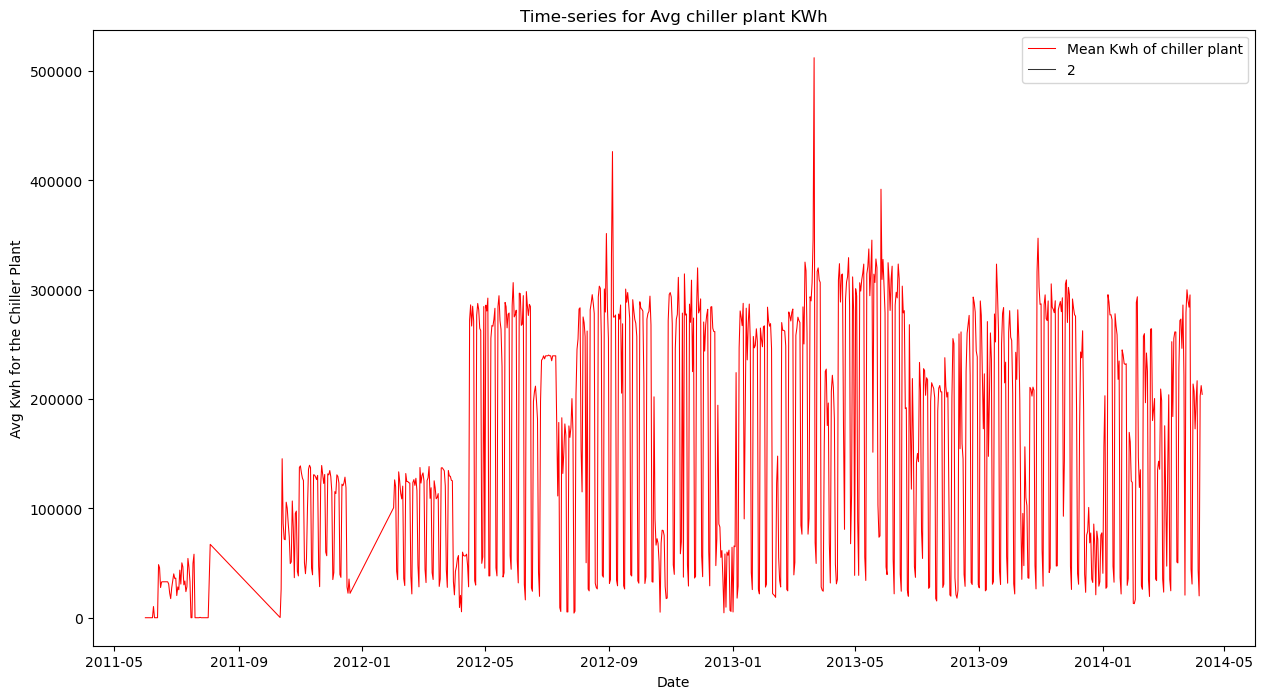

In [16]:
#lets plot the graph of the avg khw for chiller plant
plt.figure(figsize=(15,8))
sbn.lineplot(x=TS_df.index,y=TS_df['Total_kwh'],color='red',label='Mean Kwh of chiller plant',size=2)
plt.xlabel('Date')
plt.ylabel('Avg Kwh for the Chiller Plant')
plt.title("Time-series for Avg chiller plant KWh")
plt.savefig('intialplot-ts.png')

#### We will aslo plot desnity plot

<AxesSubplot:xlabel='Total_kwh', ylabel='Density'>

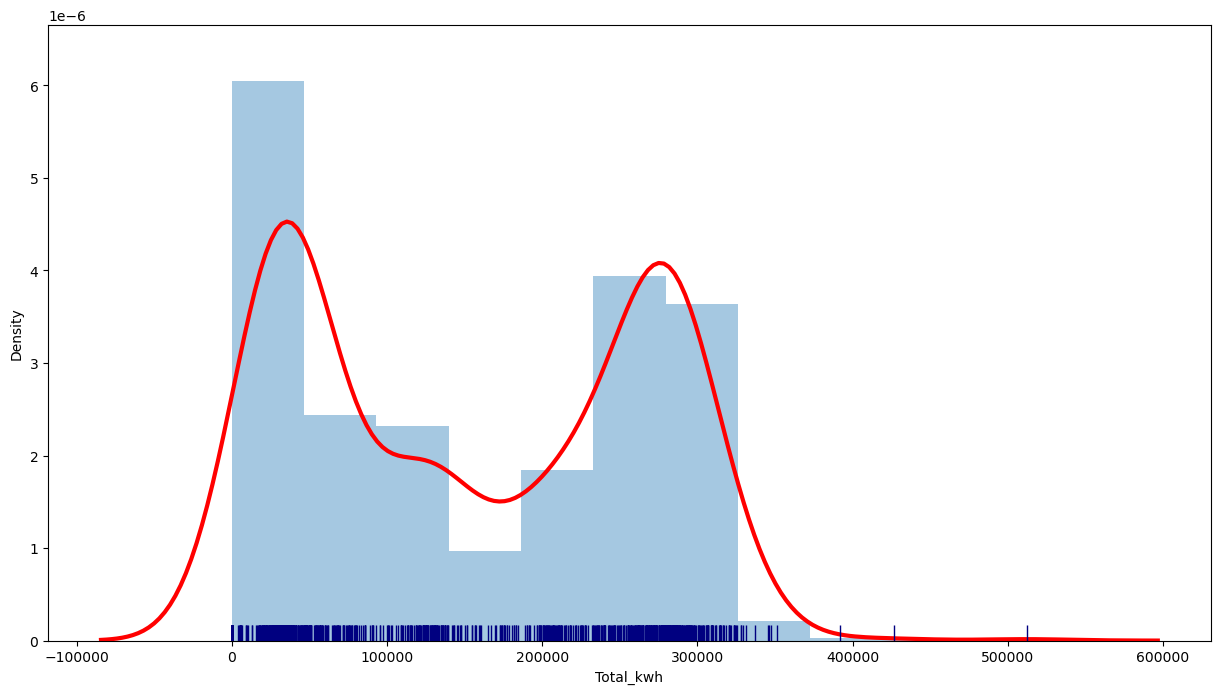

In [17]:
plt.figure(figsize=(15,8))
sbn.distplot(TS_df['Total_kwh'],kde=True,kde_kws={'lw':3,'color':'red'},rug=True,rug_kws={'color':'navy'})


## We will start building our time series model

### We will start with checking the stationarity

#### We will use dickey fuller test and visualization to check the stationarity of the data

#### Hypothesis testing for Stationarity of the data

##### H0(Null Hypothesis): The Time series is not stationary
##### H1(Alternate hypothesis: The Time series is stationary

##### the confidence interval will be 0.05

In [18]:
def dickey_fuller(data):
    result=adfuller(data)
    test_stat=result[0]
    P_val=result[1]
    Critical_val=result[4]
    print("Test Statistics: ",test_stat)
    print("P_val: ",P_val)
    print("Critical value is: ",Critical_val)

In [19]:
def plot_mean_std(data):
    sbn.set_style('whitegrid')
    y_1=data.rolling(6).mean()
    y_2=data.rolling(6).std()
    plt.figure(figsize=(15,8))
    sbn.lineplot(y=data,x=data.index,color='red',label='mean KWH')
    sbn.lineplot(y=y_1,x=data.index,color='black',size=0.5,label='rolling mean')
    sbn.lineplot(y=y_2,x=data.index,color='blue',label='std deviation')

In [20]:
dickey_fuller(TS_df)

Test Statistics:  -3.789946922982587
P_val:  0.003011862202489351
Critical value is:  {'1%': -3.437548486956221, '5%': -2.864717822047763, '10%': -2.5684620784026433}


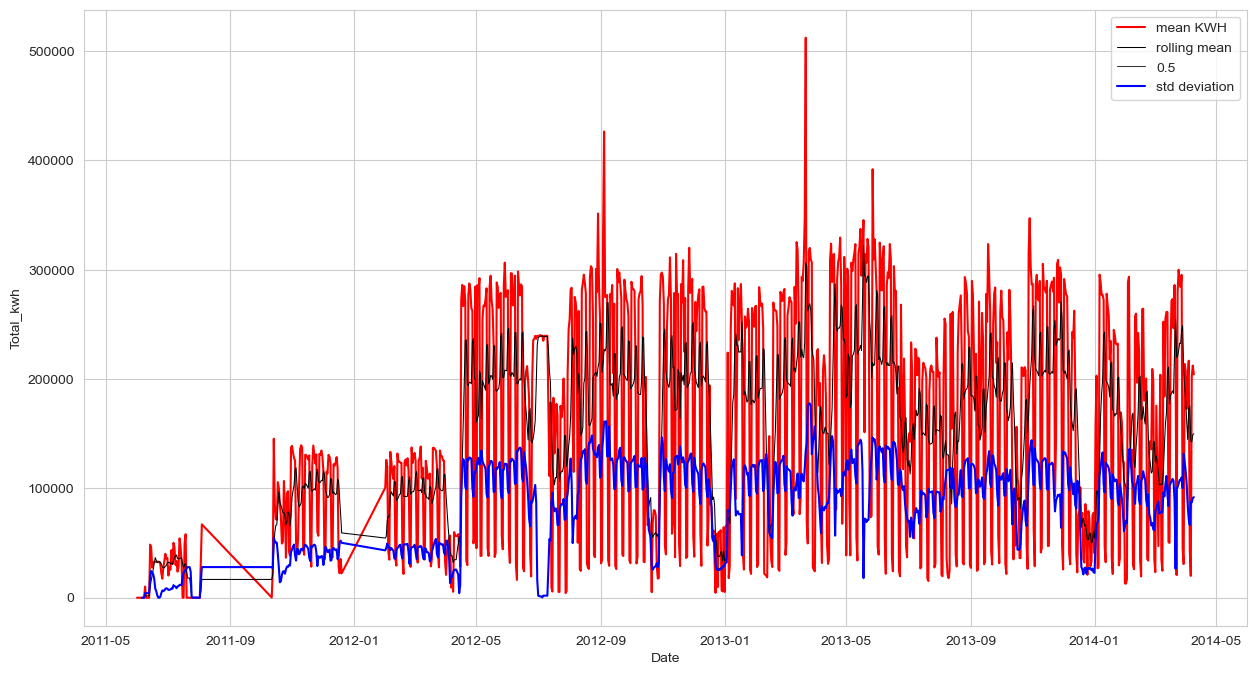

In [21]:
plot_mean_std(TS_df['Total_kwh'])

#### We can see from dickey fuller test taht our P value is lesser than the the confidence interval and test stat is also lesser than the critical value hence we <b> Reject the Null hypothesis or Accept the Alternate hypothesis </b>

#### This means <b> The Time Series is Stationary </b>

#### first we will build the Walk forward model then We will build ARIMA model to predict the data for next Date and will compare the results

#### 1. Walk forward validation

In [22]:
test_size=int(len(TS_df['Total_kwh'])*0.50)
df=TS_df['Total_kwh']
df.index=[i for i in range(len(df))]
train_data=df[:test_size]
test_data=df[test_size:]

In [23]:
test_data.head()

466    61814.800001
467     6735.109998
468     5737.879998
469    64422.309990
470     5251.089999
Name: Total_kwh, dtype: float64

In [24]:
history=[]
predictions=[]

history=[x for x in train_data]

for i in range(len(test_data)):
    preds=history[-1]
    predictions.append(preds)
    history.append(test_data[i+test_size])

In [25]:
df_walk=pd.DataFrame()

df_walk['Predictions']=predictions
df_walk['Actual']=test_data.values

df_walk.shape

(467, 2)

In [26]:
df_walk.head()

,Predictions,Actual
0,57194.960001,61814.800001
1,61814.800001,6735.109998
2,6735.109998,5737.879998
3,5737.879998,64422.309990
4,64422.309990,5251.089999


In [27]:
rmse=np.sqrt(mean_squared_error(df_walk['Predictions'],df_walk['Actual']))
print(rmse)

115927.97533956665


#### 2. ARIMA model

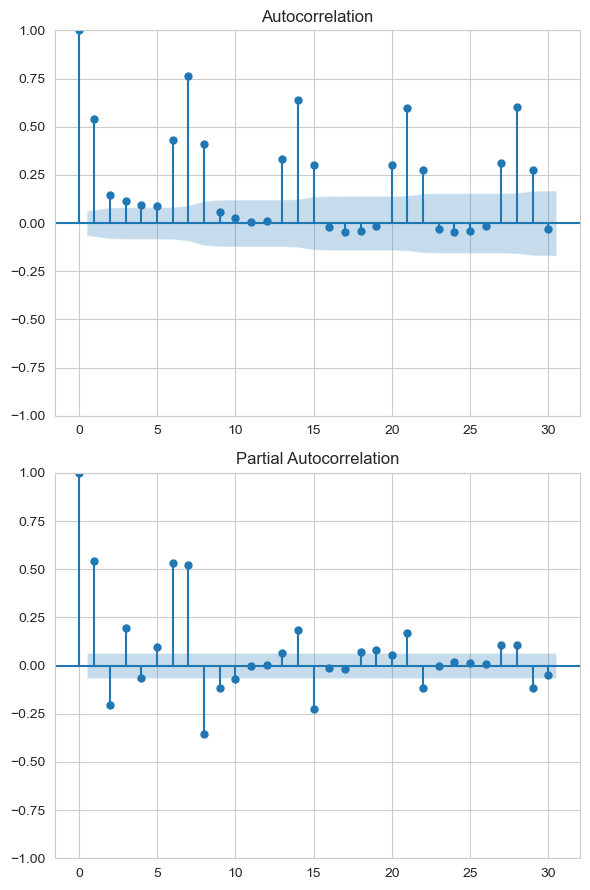

In [28]:
# We will use PACF and ACF graphs to get p and q values
plt.figure(figsize=(6,9))
plt.subplot(211)
plot_acf(TS_df['Total_kwh'],ax=plt.gca()) #gca=get current axis
plt.subplot(212)
plot_pacf(TS_df['Total_kwh'],ax=plt.gca()) #gca=get current axis
plt.tight_layout()
plt.show()

#### From above will go with p=q=0, and will select d=1

#### Building ARIMA model with above paramerers

In [29]:
data_arima=TS_df['Total_kwh']
data_arima.index=[i for i in range(len(data_arima))]
test_size= int(len(data_arima)*0.5)

In [30]:
test_size

466

In [31]:
train_data=data_arima[:test_size]
test_data=data_arima[test_size:]

In [32]:
len(train_data)

466

In [33]:
len(test_data)

467

In [34]:
predictions_arima=[]
history_arima=[]
history_arima=[x for x in train_data]

In [35]:
# We will run ARIMA model in loop to get the predictions
for i in range(0,len(train_data)):
    ARIMA_model=ARIMA(history_arima,order=(0,1,0))
    model_fit=ARIMA_model.fit()
    preds=model_fit.forecast()[0]
    predictions_arima.append(preds)
    history_arima.append(test_data[i+test_size])

In [39]:
rmse_ar=np.sqrt(mean_squared_error(predictions_arima,test_data.values[0:-1]))
print(rmse_ar)

116051.70007325093


#### The walk forwarad validation has got better RMSE

#### We will do parameter testing for ARIMA and will check

In [40]:
def eval_model(data,order_input):
    history=[]
    predictions=[]
    data.index=[i for i in range(len(data))]
    test_size=int(len(data)*0.50)
    train_data=data[:test_size]
    test_data=data[test_size:]
    history=[x for x in train_data]
    for i in range(len(train_data)):
        ARIMA_model=ARIMA(history,order=order_input)
        model_fit=ARIMA_model.fit()
        preds=model_fit.forecast()[0]
        predictions.append(preds)
        history.append(test_data[i+test_size])
    rmse=np.sqrt(mean_squared_error(predictions,test_data.values))
    return rmse 

In [41]:
def eval_param(data):
    data=data
    order_lst=[]
    rmse_lst=[]
    df=pd.DataFrame()
    p=range(0,5)
    q=range(0,5)
    d=range(0,3)
    for p_val in p:
        for q_val in q:
            for d_val in d:
                try:
                    order_input=( p_val,d_val,q_val)
                    rmse=eval_model(data,order_input)
                    order_lst.append(order_input)
                    rmse_lst.append(rmse)  
                except:
                    continue        
                    
    df.index=order_lst
    df['rmse']=rmse_lst
    return df

In [ ]:
df=eval_param(TS_df['Total_kwh'])